<a href="https://colab.research.google.com/github/sandip6724/Deep-Learning/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target feature here is PE (Power Plant Energy output)

### Step 2 - Perform Basic data quality checks

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)

0.004285117056856187

### Step 3: Seperate X and Y(PE)

In [ ]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Create a Preprocessing Pipeline for X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


### Step 5: Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2,random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### Step 5: Build the Keras neural network

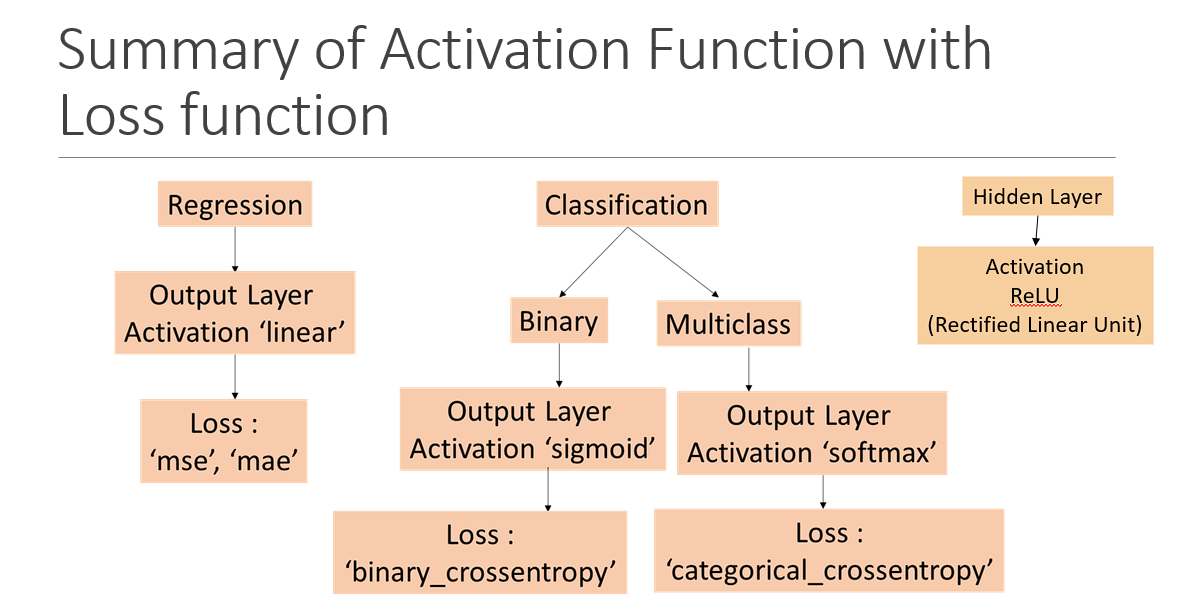

In [19]:
xtrain.shape

(7654, 4)

In [20]:
xtrain.shape[1]

4

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [25]:
# initialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1])))

# add the hidden layer 1
model.add(Dense(units=8, activation='relu'))
# add the hidden layer 2
model.add(Dense(units=4, activation='relu'))
# add the output layer
model.add(Dense(units=1, activation='linear'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [28]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 4s 5ms/step - loss: 205578.9531 - mae: 453.0620 - val_loss: 203206.2969 - val_mae: 450.4222
Epoch 2/100
192/192 [==============================] - 1s 4ms/step - loss: 199232.9531 - mae: 445.9754 - val_loss: 191413.7188 - val_mae: 437.1578
Epoch 3/100
192/192 [==============================] - 1s 4ms/step - loss: 179465.1094 - mae: 423.1509 - val_loss: 163416.7812 - val_mae: 403.7679
Epoch 4/100
192/192 [==============================] - 1s 3ms/step - loss: 143623.0938 - mae: 377.6018 - val_loss: 121556.4609 - val_mae: 346.5049
Epoch 5/100
192/192 [==============================] - 1s 4ms/step - loss: 99215.0000 - mae: 309.6549 - val_loss: 78011.0859 - val_mae: 270.4479
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 60372.9609 - mae: 230.0015 - val_loss: 46468.3438 - val_mae: 194.0066
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 36544.1484 - mae: 166.6358 - val_loss: 30230.71

### Evaluate the model in train and test

In [29]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 3ms/step - loss: 20.6387 - mae: 3.5508


[20.63871192932129, 3.550826072692871]

In [30]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 4ms/step - loss: 19.2267 - mae: 3.4232


[19.22671127319336, 3.4231529235839844]

### plot the learning curve

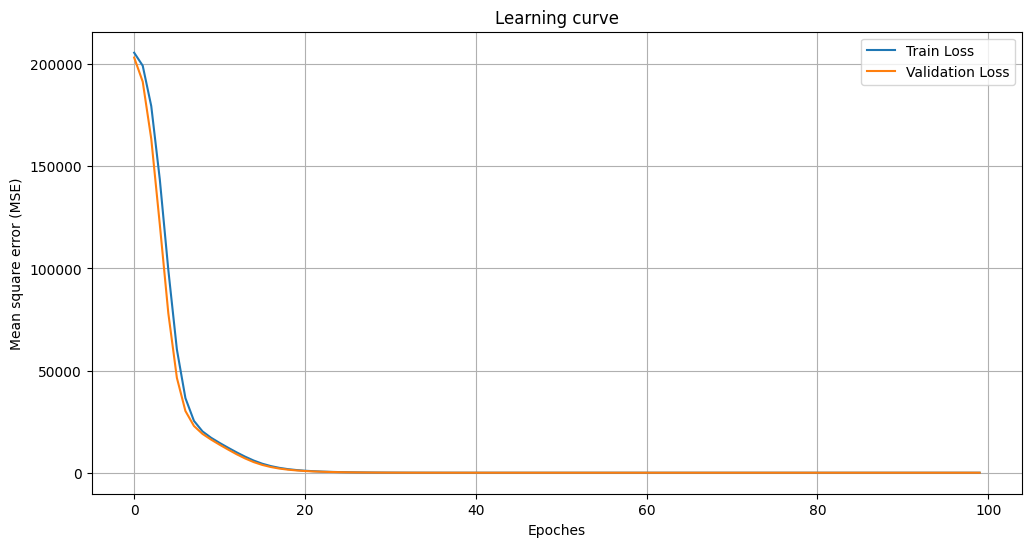

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label = 'Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoches')
plt.ylabel('Mean square error (MSE)')
plt.title('Learning curve')
plt.legend()
plt.grid()
plt.show()

### Predict the results for train and test

In [32]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 3ms/step


In [33]:
ypred_train[0:5]

array([[442.44534],
       [433.89813],
       [431.4745 ],
       [428.0041 ],
       [431.833  ]], dtype=float32)

In [35]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [36]:
ypred_test[0:5]

array([[435.479  ],
       [436.17218],
       [461.1757 ],
       [476.77347],
       [434.77554]], dtype=float32)

In [37]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### Perform detailed evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [39]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')

In [40]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step
Mean Squared Error : 20.64
Root Mean Squared Error : 4.54
Mean Absolute Error : 3.55
R2 Score : 0.9294


### R2 score in test is 0.9336 > 0.8 hence above model is very good

### Saving above model (.keras)

In [41]:
model.save('PowerOutput.keras')

### Load the above model

In [42]:
from keras.models import load_model

In [43]:
m = load_model('/content/PowerOutput.keras')

In [44]:
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.5712635 ,  0.04141485,  0.5999146 , -0.5903936 , -0.10438542,
         -0.5078925 , -0.7015559 ,  0.08489543],
        [ 1.1370227 ,  0.01238737,  1.0829402 ,  0.00167834, -0.643499  ,
         -0.17375864, -1.4039986 ,  0.42084035],
        [-0.01588985,  0.04033138, -0.48893964, -1.1437132 ,  0.6041354 ,
          1.1747755 ,  0.00169713,  0.07575819],
        [-0.36741543,  0.08834875, -0.13423714,  0.57412213,  0.34869447,
         -0.06574684, -0.34387097,  0.5119805 ]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([ 3.6917274 , -0.18454301,  3.8990052 ,  3.5273762 ,  3.5379903 ,
         3.6839478 ,  3.3379245 ,  0.03581822], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[-0.29061678,  2.2964664 ,  2.623972  ,  2.3051896 ],
        [ 0.38035706, -0.00316419,  0.24600074, -0.41805363],
        [-0.60678345,  2.212009 